# 7.7.4 Agrupamiento aglomerativo

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

import warnings
warnings.filterwarnings("ignore")

Los métodos de agrupamiento jerárquico son una familia de algoritmos que construyen clusters anidados ya sea por unión o partición de clusters, formando un árbol. La raíz del árbol corresponde a un único cluster que contiene todos los datos, mientras que los nodos terminales contienen un único dato.

En sklearn se implementa el algoritmo de clustering aglomerativo en donde se inicia asignando un cluster a cada muestra de datos. El algoritmo une los dos clusters más cercanos en cada iteración. Existen diferentes criterios de enlace (linkage) entre los clusters:

- **maximum**: Se minimiza la máxima distancia entre observaciones de pares de clusters. La distancia entre dos clusters es calculada como:

$$ dist(A,B) = max \{d(a,b): a \epsilon A, b \epsilon B \} $$

- **single**: minimiza la distancia entre las observaciones más cercanas de pares de clusters. La distancia entre dos clusters es calculada como:

$$ dist(A,B) = min \{d(a,b): a \epsilon A, b \epsilon B \} $$

- **ward**: Este es un criterio de mínima varianza. En cada iteración se busca el par de clusters que llevan al mínimo incremento de la varianza entre elementos del cluster. Es decir, si se tienen cuatro clusters A, B, C y D, se evaluan las parejas (A, B), (A, C), …, (C, D) y se selecciona aquella con la mínima varianza.

$$ dist(A,B) = mean \{d(a,b):a \epsilon A, b \epsilon B \} $$

En este algoritmo tambien tiene que definirse el parámetro **affinity** que indica la forma en como se computa la métrica d(a,b).

- **euclidian**

$$ d(x,y)= \sqrt{\sum_{i}^{n}(x_i−y_i)^2} $$

- **l1**: Corresponde a la distancia de Manhattan.

$$ d(x,y) = ||x−y|| = \sum_{i}^{}|x_i−y_i| $$

- **cosine**

$$ \overrightarrow{u} * \overrightarrow{v} =   |u|*|v| cos \theta $$ 


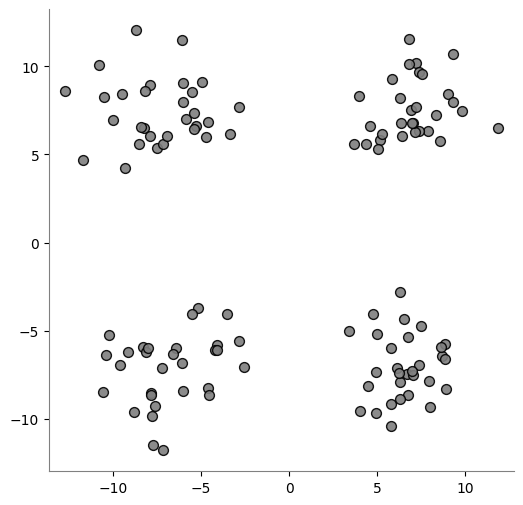

In [7]:
X, y = make_blobs(
    n_samples=120,
    n_features=2,
    centers=[
        [7, 7],
        [-7, 7],
        [-7, -7],
        [7, -7],
    ],
    cluster_std=2.0,
    shuffle=False,
    random_state=5,
)

plt.figure(figsize=(6, 6))

plt.scatter(
    X[:, 0],
    X[:, 1],
    color="tab:gray",
    edgecolors="k",
    s=50,
    alpha=0.9,
)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.axis("equal")
plt.show()

In [10]:
agglomerativeClustering = AgglomerativeClustering(
    # -------------------------------------------------------------------------
    # The number of clusters to find.
    n_clusters = None,
    # -------------------------------------------------------------------------
    # "l1", "l2", "manhattan", "cosine", or "precomputed". If linkage is
    # "ward", only "euclidean" is accepted.
    affinity='euclidean',
    # -------------------------------------------------------------------------
    # {'ward', 'complete', 'average', 'single'}
    linkage='ward',
    # -------------------------------------------------------------------------
    # The linkage distance threshold above which, clusters will not be merged.
    distance_threshold=0,
)

agglomerativeClustering.fit(X)

AgglomerativeClustering(affinity='euclidean', distance_threshold=0,
                        n_clusters=None)

In [11]:
agglomerativeClustering.n_clusters_

120

In [12]:
agglomerativeClustering.labels_

array([ 89, 103, 101, 106, 109,  62,  65,  90, 119, 107,  82,  76,  95,
        72,  59, 111, 110, 102, 116,  80,  87,  92, 108,  74, 105,  63,
        81,  44,  83,  73,  98,  99,  94,  40,  75, 100,  50,  77, 115,
       114,  57,  91,  60,  71,  67,  54,  79, 113,  86,  37,  93,  68,
        78,  69, 117,  85,  39,  66,  33, 104,  51,  46,  64,  45,  31,
       118,  35,  96,  58,  70,  88,  52,  43,  29,  61,  28,  84,  49,
        47,  42,  53,  30,  56,  97,  14,  24,  41,  19,  48,  21,  34,
        25,  38,  16,  32,  36, 112,  15,  55,  26,  27,  22,  20,  13,
        17,  18,   9,  10,  23,   8,  11,   7,  12,   6,   3,   5,   2,
         4,   1,   0], dtype=int64)

In [13]:
agglomerativeClustering.n_leaves_

120

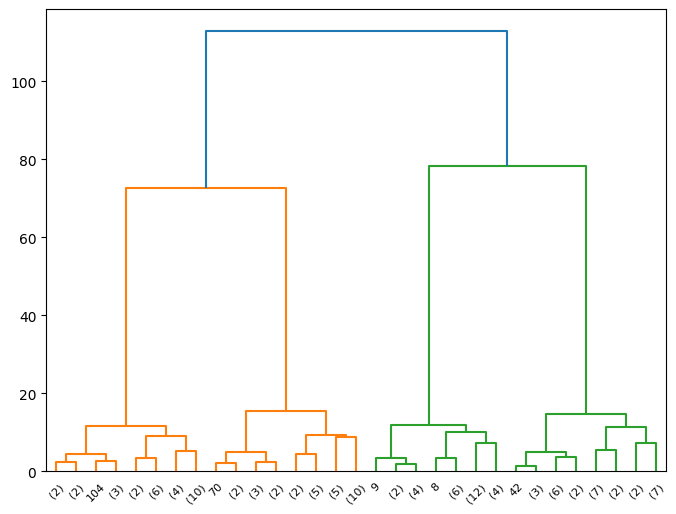

In [15]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)


plt.figure(figsize=(8,6))
plot_dendrogram(
    agglomerativeClustering,
    truncate_mode="level",
    p=4,
)

In [8]:
print('ok_')

ok_
